In [1]:
import numpy as np
import pandas as pd

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
X = np.zeros((x_train.shape[0], 784))

In [4]:
for i in range(x_train.shape[0]):
    X[i] = x_train[i].flatten()

In [5]:
X = pd.DataFrame(X)
X.shape



(60000, 784)

In [6]:
Y = pd.DataFrame(y_train)
Y.head()

,0
0,5
1,0
2,4
3,1
4,9


In [7]:
X = X.sample(frac=0.1, random_state=10).reset_index(drop=True)
Y = Y.sample(frac=0.1, random_state=10).reset_index(drop=True)

In [10]:
X.shape



(6000, 784)

In [9]:
Y.shape

(6000, 1)

In [11]:
df = X

In [14]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 202.8047161102295 seconds


In [15]:
df['label'] = Y

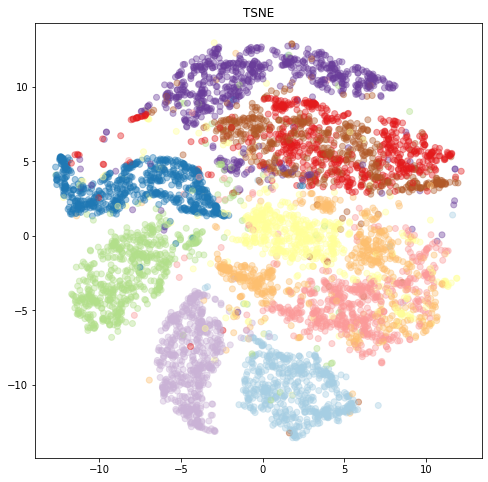

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=df['label'], 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()